In [83]:

import torch
import os
import pandas as pd
import seaborn as sns
import random
from torch.distributions.multinomial import Multinomial
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Section 2.1


## Data Manipulation

In [2]:
x = torch.arange(12, dtype=torch.float32)D
x

SyntaxError: invalid syntax (3033716821.py, line 1)

In [3]:
x = torch.arange(12).float()
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
x.numel()

In [ ]:
x.shape

In [ ]:
X = x.view(3,4)
X

In [ ]:
x
x.reshape(3,-1)
x

In [ ]:
torch.zeros((2,3,4))

In [ ]:
torch.ones((2,3,4))

In [ ]:
print (torch.randn(3,4))

In [ ]:
torch.randn(3,4)

In [ ]:
torch.tensor([[2, 2, 4, 3],
              [1, 2, 3, 4],
              [4, 3, 2, 1]])


In [ ]:
X[-1], X[1:3]

In [ ]:
print (X)
print (X[1, 2].item())
X[1, 2] = 17
print (X)
print (X[1, 2].item())

In [ ]:
X[:2, :] = 12
X

In [ ]:
torch.exp(x)

In [ ]:
x.exp()

In [ ]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x+y, x-y, x*y, x**y


In [ ]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X,Y),dim=0), torch.cat((X,Y),dim=1)

In [ ]:
X > Y

In [ ]:
a = torch.arange(6).view((2, 3, 1))
b = torch.arange(3).view((1, 3))

# 2 x 3 x 1
#     1 x 3

a.shape, b.shape

In [ ]:
print (a.shape)
print (a)
print (b)
a*b

In [ ]:
A = torch.randn((8,1,6,1))
B = torch.randn((7, 1, 5))

print (f'{A.shape=}')
print (f'{B.shape=}')

# 8 x 1 x 6 x 1
#     7 x 1 x 5

C = A*B
print (f'{C.shape=}')

a = torch.randn((2, 3, 1))
b = torch.randn((1, 3))

print (f'{a.shape=}')
print (f'{b.shape=}')

# 2 x 3 x 1
#     1 x 3

c = a*b
print (f'{c.shape=}')





In [ ]:
before = id(Y)
print (before)
Y = Y + X
print (id(Y))
id(Y) == before

In [ ]:
Z = torch.zeros_like(Y)
print (f'{id(Z)=}')
Z[:] = X + Y
print (f'{id(Z)=}')


In [ ]:
X = torch.zeros_like(Y)
print (f'{id(X)=}')
X +=  Y
print (f'{id(X)=}')

In [ ]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

In [ ]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

# Section 2.2

## Data Processing

In [ ]:
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [ ]:
data = pd.read_csv(data_file)

display (data)

In [ ]:
display(data)
print(f'{data.shape=}')
display(data.iloc[0])
print(f'{data.iloc[0].shape=}')


In [ ]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:,2]
display(inputs), display(targets);

In [ ]:
display (inputs)
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs = inputs.fillna(inputs.mean())
display (inputs)


In [ ]:
X, y = torch.tensor(inputs.values), torch.tensor(targets.values)

X, y

In [ ]:
data = pd.read_csv('../kaggle/titanic/data/train.csv')

In [ ]:
inputs, targets = data.iloc[:,2:], data.iloc[:,1]
inputs = inputs.drop(labels=['Name','Ticket','Cabin'], axis=1)
#display(inputs)
#display(targets)

display(inputs.groupby(['Pclass','Sex'])['Age'].mean())

display(inputs.groupby(['Sex'])['Age'].mean())

display(inputs['Age'].mean())

print (38.2 - 38.2/38.2**0.5)





Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

29.69911764705882

32.019385143855025


In [ ]:
display(inputs)

print (inputs.isna().sum())

inputs = inputs.fillna(inputs.groupby(['Sex','Pclass']).transform('mean',numeric_only=True))

inputs =  pd.get_dummies(inputs)

display(inputs)
display(targets)

print (inputs.isna().sum())


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.00,1,0,7.2500,0,1,0,0,1
1,1,38.00,1,0,71.2833,1,0,1,0,0
2,3,26.00,0,0,7.9250,1,0,0,0,1
3,1,35.00,1,0,53.1000,1,0,0,0,1
4,3,35.00,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.00,0,0,13.0000,0,1,0,0,1
887,1,19.00,0,0,30.0000,1,0,0,0,1
888,3,21.75,1,2,23.4500,1,0,0,0,1
889,1,26.00,0,0,30.0000,0,1,1,0,0


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [ ]:
print (inputs.isna().sum())

inputs['Age'] = inputs['Age'].fillna(inputs.groupby('Sex')['Age'].transform('mean'))

In [ ]:
display(inputs)

In [ ]:
inputs

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.00,1,0,7.2500,0,1,0,0,1
1,1,38.00,1,0,71.2833,1,0,1,0,0
2,3,26.00,0,0,7.9250,1,0,0,0,1
3,1,35.00,1,0,53.1000,1,0,0,0,1
4,3,35.00,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.00,0,0,13.0000,0,1,0,0,1
887,1,19.00,0,0,30.0000,1,0,0,0,1
888,3,21.75,1,2,23.4500,1,0,0,0,1
889,1,26.00,0,0,30.0000,0,1,1,0,0


/var/folders/g3/s8dw43sn4cbb99pp7s3zn8vc0008fx/T/ipykernel_42847/167922816.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.histplot(data=inputs,x='Age',hue='Pclass',kde=True, multiple="stack",palette = sns.color_palette("colorblind"))


<AxesSubplot: xlabel='Age', ylabel='Count'>

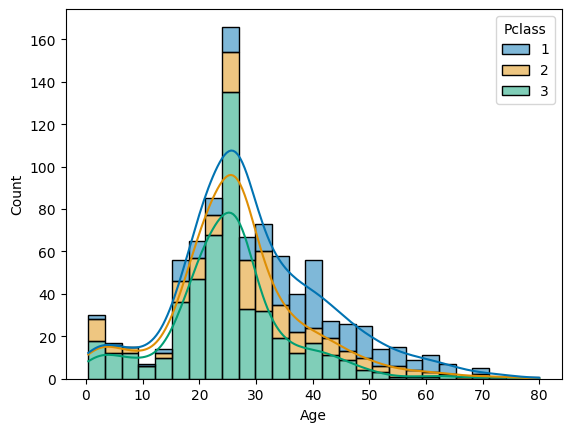

In [ ]:


sns.histplot(data=inputs,x='Age',hue='Pclass',kde=True, multiple="stack",palette = sns.color_palette("colorblind"))

In [5]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()
A, A+B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [6]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

In [26]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [27]:
x.requires_grad_(True)
x.grad

In [9]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [10]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [11]:
4*x

tensor([ 0.,  4.,  8., 12.], grad_fn=<MulBackward0>)

In [15]:
#x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [22]:
x.grad = None
x.grad

In [32]:
y = x*x
y.backward(gradient=torch.ones(len(y)))
x.grad

tensor([0., 2., 4., 6.])

In [38]:
x = torch.arange(4.0)
x.requires_grad_(True)
#x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad 

tensor([0., 1., 4., 9.])

In [39]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([True, True, True, True])

In [40]:
def f(a):
    b = a*2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c


In [45]:
a = torch. randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [47]:
a, a.grad, a.grad == d/a

(tensor(2.0524, requires_grad=True), tensor(512.), tensor(True))

In [49]:
x = torch.arange(20)/10.

print (x, f(x))

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000]) tensor([  0.0000,  25.6000,  51.2000,  76.8000, 102.4000, 128.0000, 153.6000,
        179.2000, 204.8000, 230.4000, 256.0000, 281.6000, 307.2000, 332.8000,
        358.4000, 384.0000, 409.6000, 435.2000, 460.8000, 486.4000])


In [50]:
a = torch. randn(size=(), requires_grad=True)


In [51]:
d = f(a)
d.backward()
a.grad

tensor(2048.)

In [58]:
# Probabilities are theortical quantities intrisic to the underlying distributions
# Statistics are the empirale measured quantities, like n_t/n
# Estimators estimate the theoretical probabilty from the measured statistics

num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [50, 50]


In [74]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(1000, fair_probs).sample((10,))/1000.

tensor([[0.4870, 0.5130],
        [0.5350, 0.4650],
        [0.5030, 0.4970],
        [0.4920, 0.5080],
        [0.5110, 0.4890],
        [0.4680, 0.5320],
        [0.4980, 0.5020],
        [0.4960, 0.5040],
        [0.4800, 0.5200],
        [0.4930, 0.5070]])

In [63]:
weights = 1
counts = Multinomial(1, 4, replacement=True)#.sample()/100.

TypeError: __init__() got an unexpected keyword argument 'replacement'

/var/folders/g3/s8dw43sn4cbb99pp7s3zn8vc0008fx/T/ipykernel_74840/519852730.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, 0.5/x**0.5 + 0.5, label='expected convergence')


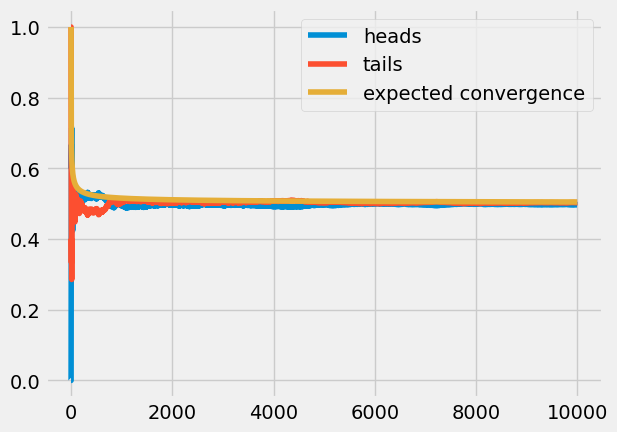

In [88]:
counts = Multinomial(1, fair_probs).sample((10000, ))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts/cum_counts.sum(dim=1, keepdim=True)
estimates = estimates.numpy()
estimates

plt.plot(estimates[:,0], label='heads')
plt.plot(estimates[:,1], label='tails')
x = np.arange(len(estimates))
plt.plot(x, 0.5/x**0.5 + 0.5, label='expected convergence')
plt.legend()

In [94]:
np.exp(2.0)**2, np.exp(2.0+2.0)

(54.59815003314424, 54.598150033144236)

In [95]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [98]:
??torch.ones

Docstring:
ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `1`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword arguments:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_tensor_type`). :attr:`